# TP 5: Équation Eikonale

# 1. Équation eikonale en dimension 1
On s'intéresse à l'approximation numérique de l'unique solution de viscosité de l'EDP suivante:

$$ \newcommand{\abs}[1]{|#1|}
\newcommand{\nr}[1]{\|#1\|}
 \newcommand{\Rsp}{\mathbb{R}}
 \newcommand{\Mat}{\mathcal{M}}
\begin{cases} \abs{u'(x)} = 1 & \hbox{ sur } [0,1] \\ 
u(0) = u(1) = 0.
\end{cases}
$$

Ici, la solution est connue et explicite: il s'agit de la fonction $u(x) = 0.5 - \abs{x-.5}$. Soient $M > 0$, $h=1/(M+1)$ et $x_i = i/h$ pour $0\leq i\leq M+1$. On discrétise l'équation eikonale par le système non-linéaire suivant 

$$ P_h(u) = b $$

où $u\in \Rsp^{M+2}$, $b = (0,1,\dots,1,0) \in \Rsp^{M+2}$ et où l'application $P_h: \Rsp^{M+2}\to\Rsp^{M+2}$ est définie par

$$\begin{cases}
P_h(u)_0 = u_0, \\
P_h(u)_{M+1} = u_{M+1}, \\
P_h(u)_i = \max\left(0, \frac{u_i - u_{i-1}}{h}, \frac{u_i - u_{i+1}}{h}\right),  & \hbox{ pour } 1\leq i\leq M\\
\end{cases}
$$

Comme l'application $P_h$ n'est pas linéaire, il n'existe pas de routine toute faite pour résoudre le problème $P_h(u) = b$. Nous allons considérer ici un algorithme itératif simple, qui fait croître les valeurs de $u$ coordonnées à coordonnées et que l'on peut voir comme une implémentation discrète de la "méthode de Perron" en EDP. On commence par $u^0 = (0,\dots,0) \in \Rsp^{M+2}$ et on va construire une suite $u^k \in \Rsp^{M+2}$ pour $k=1,\dots$ tel que $u^k \leq u^{k+1}$ et telle que pour tout $k\geq 0$, $P_h(u^k) \leq b$. 

**Q1.** Montrer que $P_h(u^0) \leq b$.

**Q2.** Soir $u \in\Rsp^{M+2}$ tel que $P_h(u) \leq b$. Montrer que pour tout $0\leq i\leq M+2$, et  tout $t\geq 0$, on a

$$ \forall j\in \{0,\dots,M+2\}\setminus\{i\},\qquad P_h(u+t e_i)_j \leq b_j, $$

où $e_i$ est le $i$ème vecteur de la base canonique.

**Q3.** Soient $u \in \Rsp^{M+2}$ et $1\leq i\leq M$ tels que $P_h(u)_i \leq b_i$. Montrer que l'unique $t_i \in \Rsp$ tel que 
$P_h(u + t_i e_i)_i = b_i$ est donné par 

$$ t_i = h \min\left(b_i - \frac{u_i-u_{i-1}}{h}, b_i - \frac{u_i-u_{i+1}}{h}\right).$$

En particulier, $t_i = 0$ si et seulement si $u$ vérifie $P_h(u)_i = b_i$.

On considère l'algorithme suivant:


$$ 
\begin{cases}
u^0 = (0,\dots,0)\in\Rsp^{M+2} \\
t^k_0 = t^k_{M+1} = 0& \hbox{ pour } k\geq 0\\
t^k_i = h \min\left(b_i - \frac{u^k_i - u^k_{i-1}}{h}, b_i - \frac{u^k_i-u^k_{i+1}}{h}\right), & \hbox{ pour } k\geq 0, 1\leq i\leq M \\
u^{k+1} = u^k + t^k
\end{cases}
$$

**Q4.** Montrer que $u^{k} \leq u^{k+1}$ et que $P_h(u^k) \leq b$ pour tout $k\geq 0$.

On admettra qu'il existe une constante $M$ telle que $P_h(u) \leq b \Longrightarrow u \leq M$. 

**Q5.** Démontrer que la suite $u^k$ converge vers $u^\infty$, puis que $P_h(u^\infty) = b$.

**Q6.** Implémenter l'algorithme et tracer sur une même figure l'évolution de $u^k$ pour $1\leq k\leq M$.

In [1]:
import numpy as np
import scipy.misc as spmisc
%matplotlib inline
import matplotlib.pyplot as plt

M = 100
x = np.linspace(0,1,M+2)
h = 1./(M+1)
u = np.zeros(M+2)
b = np.ones(M+2)
b[0] = b[M+1] = 0

# compléter

# 2. Équation eikonale en dimension 2

On s'intéresse maintenant à la dimension $2$ dans le domaine $\Omega = ]0,1[^2:

$$
\begin{cases} \nr{\nabla u(x)} = 1 & \hbox{ sur } \Omega \\ 
u = 0 & \hbox{ sur } \partial \Omega. 
\end{cases}
$$

Là encore, la solution est connue et explicite: il s'agit de la fonction $u(x) = 0.5 - \nr{x-\bar{x}}$ où $\bar{x} = (.5,.5)$. Soient $M > 0$, $h=1/(M+1)$ et $x_{i,j} = (i/h,j/h)$ pour $0\leq i\leq M+1$. On considère une variable discrète $(u_{i,j})_{1\leq i,j\leq M+1}$ comme une matrice de taille $(M+2)\times (M+2)$. On note l'ensemble des matrices $\Mat_{M+2,M+2}$ \in \Rsp^{(M+2) \times (M+2)}$. On discrétise l'équation eikonale par le système non-linéaire suivant 

$$ P_h(u) = b $$

où $b_{i,j} = 0$ si $x_{i,j} \in \partial \Omega$ et $b_{i,j} = 1$ sinon, et où $P_h: \Mat_{M+2,M+2}\to\Mat_{M+2,M+2}$ est défini par

$$\begin{cases}
P_h(u)_{i,j} = u_{i,j} & \hbox{ si } i \in \{0,M+1\} \hbox{ ou } j \in \{0,M+1\} \\
P_h(u)_{i,j} = \sqrt{\max\left(0, \frac{u_{i,j} - u_{i-1,j}}{h}, \frac{u_{i,j} - u_{i+1,j}}{h}\right)^2+
\max\left(0, \frac{u_{i,j} - u_{i,j-1}}{h}, \frac{u_{i,j} - u_{i,j+1}}{h}\right)^2},  & \hbox{ pour } 1\leq i,j\leq M\\
\end{cases}
$$

L'algorithme permettant de résoudre numériquement le système $P_h(u) = b$ est  le même que précédemment. On commence par  fixer $u^0 = 0 \in \Mat_{M+2,M+2}$, de sorte que $P_h(u^0)\leq b$ (inégalité terme à terme). Pour tout $k\geq 0$ et tout $0  \leq i,j\leq M$ on définit $t^k_{i,j}\in\Rsp$ tel que
$$ P_h(u^k + t^k_{i,j} e_{i,j}) = b_{i,j} $$
où $e_{i,j}$ est la base canonique de  $\Mat_{M+2,M+2}$. Enfin, on pose
$$ u^{k+1}_{i,j} = u^k_{i,j} + t^k_{i,j}.$$

**Q7.** Démontrer que si $P_h(u^k) \leq b$ alors $t^k_{i,j}\geq 0$ pour tout $0\leq i,j \leq M+1$. En déduire que $u^{k+1}\geq u^k$ et que $P_h(u^{k+1}) \leq b$.

Étant donné $u^k\in\Mat_{M+2,M+2}$, on admet que l'unique solution de l'équation 
$$ \sqrt{\max\left(0, \frac{x - u^k_{i-1,j}}{h}, \frac{x - u^k_{i+1,j}}{h}\right)^2+
\max\left(0, \frac{x - u^k_{i,j-1}}{h}, \frac{x - u^k_{i,j+1}}{h}\right)^2} = b_{i,j} > 0$$
est donnée par 
$$ u_{i,j}^{k+1} = \begin{cases}
\min(A_{i,j}, B_{i,j}) + b_{i,j} h & \hbox{ si } \abs{A_{i,j} - B_{i,j}} \geq b_{i,j} h \\
\frac{A_{i,j}+B_{i,j}+\sqrt{2 b_{i,j}^2 h^2 - (A_{i,j}-B_{i,j})^2}}{2} &\hbox{ sinon }
\end{cases} $$
où $A_{i,j} = \min(u_{i-1,j}, u_{i+1,j})$ et $B_{i,j} = \min(u_{i,j-1}, u_{i,j+1})$.

**Q8** Implémenter la méthode itérative décrite ci-dessous, qui converge vers une solution de $P_h(u) = b$.

*Indication: on utilisera la fonction np.where pour choisir entre les deux formules ci-dessous. Pour visualiser la fonction, on fera appel à plt.imshow(u,vmin=0,vmax=.5)*





u initial


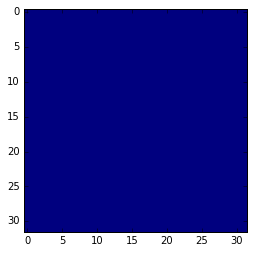

In [4]:
M = 30
h = 1./(M+1)
u = np.zeros((M+2,M+2))
b = np.ones((M+2,M+2))
b[0,:] = 0
b[M+1,:] = 0
b[:,0] = 0
b[:,M+1] = 0

print "u initial"
plt.imshow(u,vmin=0, vmax=0.5)
plt.show()

for i in xrange(2*M):
    # compléter
    ;


**Q9** Soit $u_0(x) = \frac{1}{2}\nr{x}^2$. Adapter la méthode précédente à la résolution de l'équation eikonale avec un second membre variable:
$$ \begin{cases}
\nr{\nabla u(x)} = \nr{\nabla u_0(x)} & \hbox{ sur } \Omega = ]0,1[^2\\
u(x) = u_0(x) &\hbox{ sur } \partial\Omega
\end{cases}
$$
Constater qu'il est (parfois) possible de reconstruire une fonction à partir de la norme de son gradient.


In [5]:
M = 20
h = 1.0/(M+1)
X,Y = np.meshgrid(np.linspace(0,1,M+2),
                  np.linspace(0,1,M+2))
u0 = .5*(X*X+Y*Y)

# on construit un second membre: 
b = np.sqrt(X*X+Y*Y) # à l'intérieur du domaine, b = |grad u0|
b[0,:] = u0[0,:] # au bord du domaine, b = u0
b[M+1,:] = u0[M+1,:]
b[:,0] = u0[:,0]
b[:,M+1] = u0[:,M+1]

u = np.zeros((M+2,M+2))
u[0,:] = b[0,:] # condition aux bords
u[M+1,:] = b[M+1,:]
u[:,0] = b[:,0] 
u[:,M+1] = b[:,M+1]

# compléter